In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6d6e2c44634d6defc6585134a906b7db


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | port elizabeth
Processing Record 2 of Set 13 | khani
Processing Record 3 of Set 13 | lebu
Processing Record 4 of Set 13 | lorengau
Processing Record 5 of Set 13 | arraial do cabo
Processing Record 6 of Set 13 | mahina
Processing Record 7 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 13 | qaanaaq
Processing Record 9 of Set 13 | san patricio
Processing Record 10 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 13 | talnakh
Processing Record 12 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 13 | carnarvon
Processing Record 14 of Set 13 | makubetsu
Processing Record 15 of Set 13 | nabire
Processing Record 16 of Set 13 | saskylakh
Processing Record 17 of Set 13 | hobart
Processing Record 18 of Set 13 | bluff
Processing Record 19 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 

Processing Record 32 of Set 16 | ancud
Processing Record 33 of Set 16 | waddan
Processing Record 34 of Set 16 | orlik
Processing Record 35 of Set 16 | mackay
Processing Record 36 of Set 16 | lasa
Processing Record 37 of Set 16 | cumaribo
City not found. Skipping...
Processing Record 38 of Set 16 | ndjole
Processing Record 39 of Set 16 | santa clarita
Processing Record 40 of Set 16 | sinnamary
Processing Record 41 of Set 16 | tambo
Processing Record 42 of Set 16 | tiksi
Processing Record 43 of Set 16 | tiruvottiyur
City not found. Skipping...
Processing Record 44 of Set 16 | hihifo
City not found. Skipping...
Processing Record 45 of Set 16 | robertsport
Processing Record 46 of Set 16 | anloga
Processing Record 47 of Set 16 | haradok
Processing Record 48 of Set 16 | mehamn
Processing Record 49 of Set 16 | lompoc
Processing Record 50 of Set 16 | coetupo
City not found. Skipping...
Processing Record 1 of Set 17 | caxito
Processing Record 2 of Set 17 | laguna
Processing Record 3 of Set 17 |

Processing Record 17 of Set 20 | berdigestyakh
Processing Record 18 of Set 20 | sistranda
Processing Record 19 of Set 20 | bababe
City not found. Skipping...
Processing Record 20 of Set 20 | soe
Processing Record 21 of Set 20 | winnemucca
Processing Record 22 of Set 20 | fallon
Processing Record 23 of Set 20 | lagoa
Processing Record 24 of Set 20 | lixourion
Processing Record 25 of Set 20 | natal
Processing Record 26 of Set 20 | sentyabrskiy
City not found. Skipping...
Processing Record 27 of Set 20 | chipinge
Processing Record 28 of Set 20 | springbok
Processing Record 29 of Set 20 | menongue
Processing Record 30 of Set 20 | ranau
Processing Record 31 of Set 20 | hambantota
Processing Record 32 of Set 20 | te anau
Processing Record 33 of Set 20 | luoyang
Processing Record 34 of Set 20 | fray bentos
Processing Record 35 of Set 20 | berlevag
Processing Record 36 of Set 20 | harper
Processing Record 37 of Set 20 | oksfjord
Processing Record 38 of Set 20 | chuncheng
Processing Record 39 o

Processing Record 3 of Set 24 | saint anthony
Processing Record 4 of Set 24 | scottsbluff
Processing Record 5 of Set 24 | duekoue
Processing Record 6 of Set 24 | mabaruma
Processing Record 7 of Set 24 | leningradskiy
Processing Record 8 of Set 24 | verkhnyaya inta
Processing Record 9 of Set 24 | rolla
Processing Record 10 of Set 24 | olean
Processing Record 11 of Set 24 | labuhan
Processing Record 12 of Set 24 | monterey
Processing Record 13 of Set 24 | karpathos
Processing Record 14 of Set 24 | marzuq
Processing Record 15 of Set 24 | la ronge
Processing Record 16 of Set 24 | erenhot
Processing Record 17 of Set 24 | bundaberg
Processing Record 18 of Set 24 | talara
Processing Record 19 of Set 24 | vuktyl
Processing Record 20 of Set 24 | colares
Processing Record 21 of Set 24 | bilibino
Processing Record 22 of Set 24 | bathsheba
Processing Record 23 of Set 24 | lolua
City not found. Skipping...
Processing Record 24 of Set 24 | nsanje
Processing Record 25 of Set 24 | hope
Processing Reco

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,62.60,88,0,6.91,ZA,2021-04-23 22:45:59
1,Khani,41.9563,42.9566,57.20,47,0,10.36,GE,2021-04-23 22:47:33
2,Lebu,-37.6167,-73.6500,53.83,92,26,7.29,CL,2021-04-23 22:46:01
3,Lorengau,-2.0226,147.2712,81.63,77,94,3.69,PG,2021-04-23 22:47:33
4,Arraial Do Cabo,-22.9661,-42.0278,74.88,77,13,15.41,BR,2021-04-23 22:43:26
5,Mahina,-17.5065,-149.4890,87.80,58,75,11.50,PF,2021-04-23 22:47:34
6,Qaanaaq,77.4840,-69.3632,19.83,84,100,4.74,GL,2021-04-23 22:46:53
7,San Patricio,28.0170,-97.5169,86.00,70,1,25.32,US,2021-04-23 22:47:35
8,Talnakh,69.4865,88.3972,31.51,97,100,10.71,RU,2021-04-23 22:42:57
9,Carnarvon,-24.8667,113.6333,62.60,72,0,6.91,AU,2021-04-23 22:47:06


In [19]:
new_column_order = ["city", "country", "date","lat","lng","Max temp","Humidity","Cloudiness","Wind speed",]
df =df[new_column_order]

NameError: name 'df' is not defined

In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1619218569.4488904

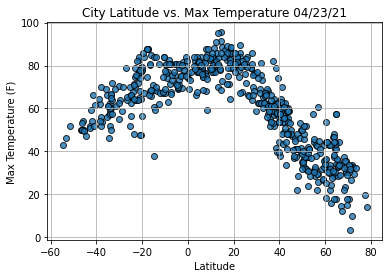

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

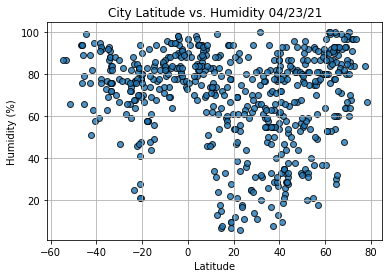

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

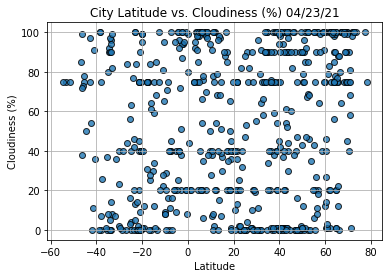

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

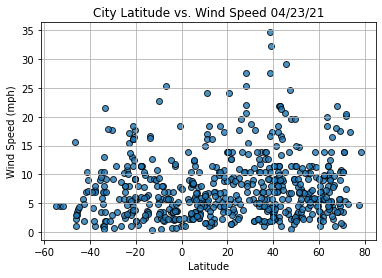

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

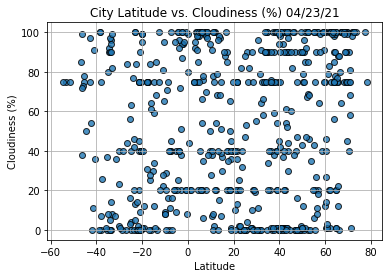

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

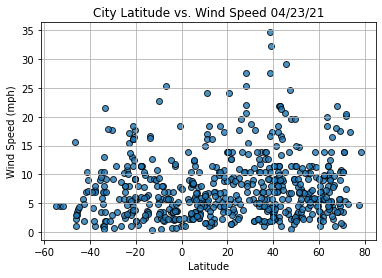

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [30]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [31]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [32]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

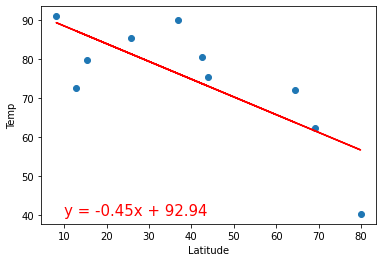

In [33]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [4]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates);  

SyntaxError: invalid syntax (<ipython-input-4-d5e189792a7b>, line 3)

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Khani,41.9563,42.9566,57.20,47,0,10.36,GE,2021-04-23 22:47:33
6,Qaanaaq,77.4840,-69.3632,19.83,84,100,4.74,GL,2021-04-23 22:46:53
7,San Patricio,28.0170,-97.5169,86.00,70,1,25.32,US,2021-04-23 22:47:35
8,Talnakh,69.4865,88.3972,31.51,97,100,10.71,RU,2021-04-23 22:42:57
10,Makubetsu,45.3714,141.8211,47.16,83,82,20.69,JP,2021-04-23 22:47:36
...,...,...,...,...,...,...,...,...,...
567,La Roche-En-Ardenne,50.1836,5.5755,39.99,79,12,1.99,BE,2021-04-23 22:50:25
568,Phitsanulok,16.9167,100.5000,89.01,56,85,6.73,TH,2021-04-23 22:50:25
571,Skovorodino,53.9833,123.9167,37.11,40,35,10.31,RU,2021-04-23 22:50:26
572,Araouane,18.9048,-3.5265,88.56,10,0,5.95,ML,2021-04-23 22:50:27


In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Khani,41.9563,42.9566,57.20,47,0,10.36,GE,2021-04-23 22:47:33
6,Qaanaaq,77.4840,-69.3632,19.83,84,100,4.74,GL,2021-04-23 22:46:53
7,San Patricio,28.0170,-97.5169,86.00,70,1,25.32,US,2021-04-23 22:47:35
8,Talnakh,69.4865,88.3972,31.51,97,100,10.71,RU,2021-04-23 22:42:57
10,Makubetsu,45.3714,141.8211,47.16,83,82,20.69,JP,2021-04-23 22:47:36


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

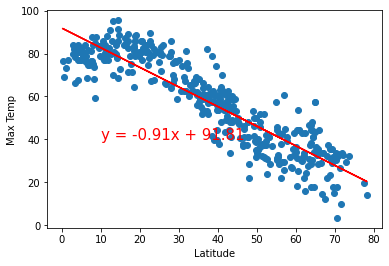

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

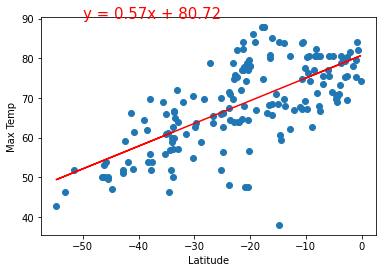

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


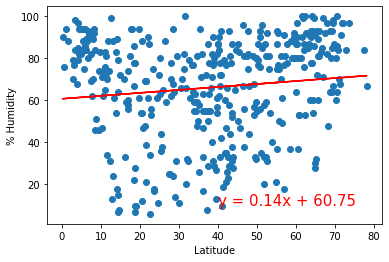

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

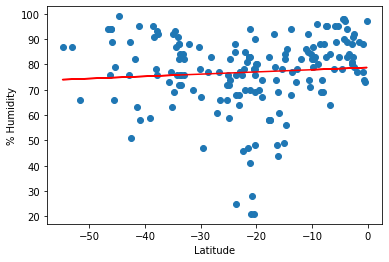

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

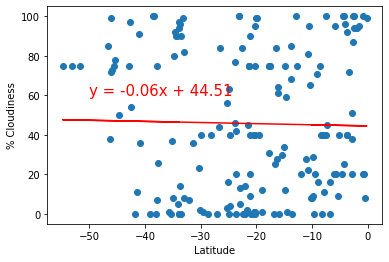

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

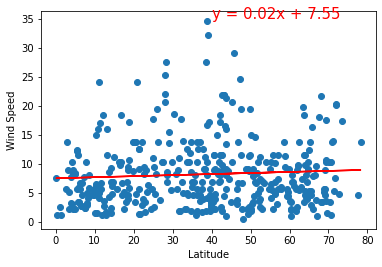

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

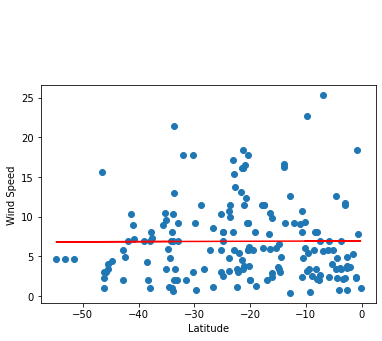

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))